In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
d1 = pd.read_csv(r"C:\Users\Ishan Yadu\Documents\IITB\Competitions\Cognizance\Cosmic Classifier\thermoracleTrain.csv")
d1.head(8)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0
5,0.749979,1.064353,2.510823,0.105772,1.203825,1.355501,NaN,Category_10,Category_9,0.551453,2.0
6,-2.971646,-0.648251,-0.915859,0.255504,-0.537165,-2.072251,1.355523,Category_8,Category_7,1.876232,1.0
7,1.981474,-1.347445,-0.483752,-3.365811,2.690204,1.199946,-1.907013,Category_12,Category_5,0.443053,NaN


In [2]:
d1.shape

(60000, 11)

In [3]:
d1.isnull().sum()

Atmospheric Density              2984
Surface Temperature              3032
Gravity                          2984
Water Content                    3077
Mineral Abundance                2921
Orbital Period                   2997
Proximity to Star                2945
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index    2942
Prediction                       3039
dtype: int64

In [4]:
(d1.isnull().sum()/d1.shape[0])*100 #Cheching percentage null values

Atmospheric Density              4.973333
Surface Temperature              5.053333
Gravity                          4.973333
Water Content                    5.128333
Mineral Abundance                4.868333
Orbital Period                   4.995000
Proximity to Star                4.908333
Magnetic Field Strength          5.096667
Radiation Levels                 5.035000
Atmospheric Composition Index    4.903333
Prediction                       5.065000
dtype: float64

In [5]:
d1.isnull().sum().sum()

33000

In [6]:
(d1.isnull().sum().sum()/(d1.shape[0]*d1.shape[1]))*100

5.0

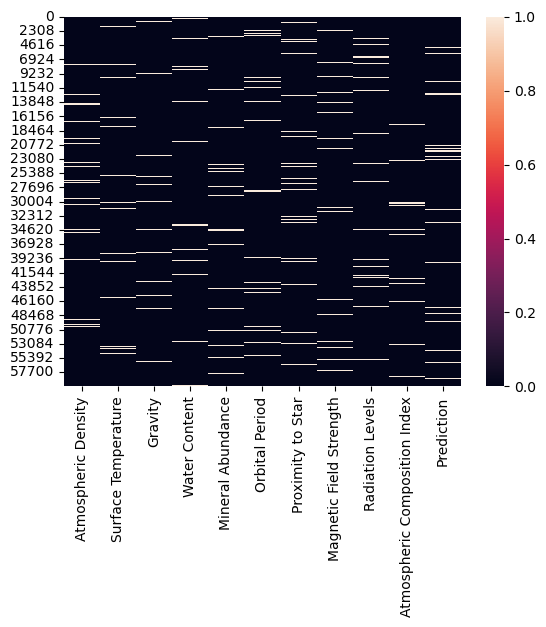

In [7]:
sns.heatmap(d1.isnull())
plt.show() #null value distribution analysis

In [8]:
d1.dropna(inplace=True)
d1.isnull().sum().sum()  #removing null values

0

In [9]:
d1.shape

(34059, 11)

In [10]:
((60000-34059)/60000)*100  #estimation of percentage data left for traning

43.235

In [11]:
d1.head(8)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0
6,-2.971646,-0.648251,-0.915859,0.255504,-0.537165,-2.072251,1.355523,Category_8,Category_7,1.876232,1.0
8,-3.306354,-0.316716,-0.431264,0.389815,-1.961216,-1.510182,0.538593,Category_8,Category_7,0.934055,1.0
10,-0.752712,-2.492542,-1.072433,-2.561734,1.158838,-1.262638,1.447444,Category_14,Category_8,0.726009,3.0
12,1.129258,-3.333453,-4.423914,-1.020409,0.711290,-0.606784,0.047264,Category_13,Category_12,-1.630504,3.0
14,-3.492167,-0.845588,-0.623381,0.532017,-1.911534,-1.216001,0.780758,Category_7,Category_8,-0.199217,1.0
15,-0.618934,3.281918,1.958590,-1.594125,-1.436394,2.387690,1.033312,Category_10,Category_9,-2.049965,7.0
16,0.267885,-0.034130,0.679999,1.239579,0.452620,1.507447,0.682192,Category_14,Category_5,0.395403,2.0


In [12]:
d1["Magnetic Field Strength"].unique()

array(['Category_6', 'Category_8', 'Category_14', 'Category_13',
       'Category_7', 'Category_10', 'Category_9', 'Category_12',
       'Category_11', 'Category_15', 'Category_4', 'Category_5',
       'Category_16', 'Category_17', 'Category_3', 'Category_18',
       'Category_2', 'Category_19', 'Category_1', 'Category_20'],
      dtype=object)

In [13]:
encode = [[ "Category_0", "Category_1", "Category_2", "Category_3",
       "Category_4", "Category_5", "Category_6", "Category_7",
       "Category_8", "Category_9", "Category_10", "Category_11",
       "Category_12", "Category_13", "Category_14", "Category_15",
       "Category_16", "Category_17", "Category_18", "Category_19", "Category_20"]]
from sklearn.preprocessing import OrdinalEncoder
d2 = OrdinalEncoder(categories = encode)
d2.fit(d1[["Magnetic Field Strength"]])
d1["Magnetic Field Strength"]=d2.transform(d1[["Magnetic Field Strength"]])

In [14]:
d1["Radiation Levels"].unique()

array(['Category_10', 'Category_7', 'Category_8', 'Category_12',
       'Category_9', 'Category_5', 'Category_6', 'Category_11',
       'Category_13', 'Category_14', 'Category_3', 'Category_4',
       'Category_15', 'Category_16', 'Category_2', 'Category_1',
       'Category_17', 'Category_18', 'Category_19', 'Category_20'],
      dtype=object)

In [15]:
d3 = OrdinalEncoder(categories = encode)
d3.fit(d1[["Radiation Levels"]])
d1["Radiation Levels"]=d3.transform(d1[["Radiation Levels"]]) #encoding the categorical data of magnetic feild and radiation levels for analysis

In [16]:
d1.head(8)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,6.0,10.0,0.407941,9.0
6,-2.971646,-0.648251,-0.915859,0.255504,-0.537165,-2.072251,1.355523,8.0,7.0,1.876232,1.0
8,-3.306354,-0.316716,-0.431264,0.389815,-1.961216,-1.510182,0.538593,8.0,7.0,0.934055,1.0
10,-0.752712,-2.492542,-1.072433,-2.561734,1.158838,-1.262638,1.447444,14.0,8.0,0.726009,3.0
12,1.129258,-3.333453,-4.423914,-1.020409,0.711290,-0.606784,0.047264,13.0,12.0,-1.630504,3.0
14,-3.492167,-0.845588,-0.623381,0.532017,-1.911534,-1.216001,0.780758,7.0,8.0,-0.199217,1.0
15,-0.618934,3.281918,1.958590,-1.594125,-1.436394,2.387690,1.033312,10.0,9.0,-2.049965,7.0
16,0.267885,-0.034130,0.679999,1.239579,0.452620,1.507447,0.682192,14.0,5.0,0.395403,2.0


In [17]:
d1.describe() #cheching the statistics of the data

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
count,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000,34059.000000
mean,-0.011847,-0.002704,0.003970,0.003003,0.005906,-0.001933,-0.005676,9.443113,8.765525,0.004431,4.457999
std,2.257107,1.936163,1.803941,1.688711,1.602094,1.514356,1.317587,2.652405,2.225588,1.125303,2.890949
min,-4.283309,-5.426189,-5.553877,-5.816755,-5.077363,-4.801046,-4.537187,1.000000,1.000000,-4.007504,0.000000
25%,-1.560969,-1.423844,-1.276465,-1.218254,-1.069377,-1.054219,-0.942822,8.000000,7.000000,-0.713259,2.000000
50%,-0.199246,-0.329629,0.053229,0.003468,0.051432,0.047483,-0.068085,9.000000,9.000000,0.050758,4.000000
75%,1.291944,1.498558,1.263103,1.062735,1.101213,1.064815,0.879585,11.000000,10.000000,0.799353,7.000000
max,9.324018,5.638094,6.030290,6.287045,5.335537,5.111014,4.731871,20.000000,20.000000,3.852567,9.000000


C:\Users\Ishan Yadu\AppData\Local\Temp\ipykernel_3368\1085508905.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Atmospheric Density"])


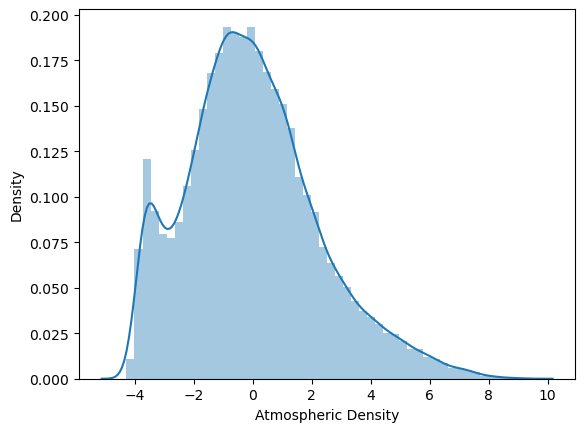

C:\Users\Ishan Yadu\AppData\Local\Temp\ipykernel_3368\1085508905.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Surface Temperature"])


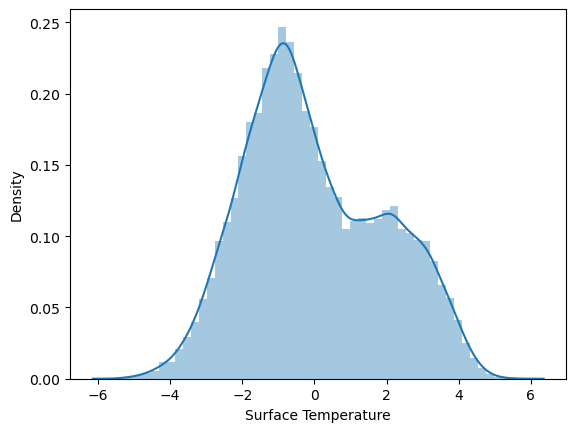

C:\Users\Ishan Yadu\AppData\Local\Temp\ipykernel_3368\1085508905.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Gravity"])


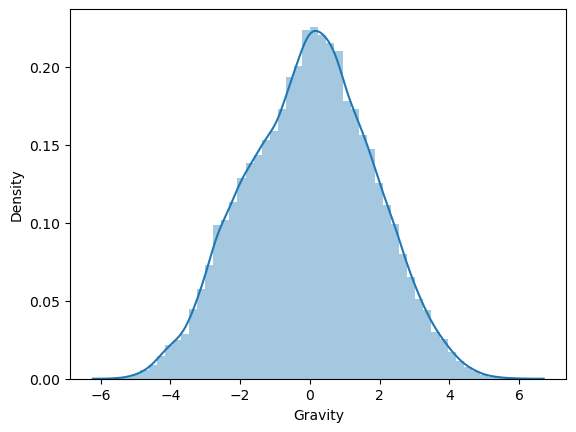

C:\Users\Ishan Yadu\AppData\Local\Temp\ipykernel_3368\1085508905.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Water Content"])


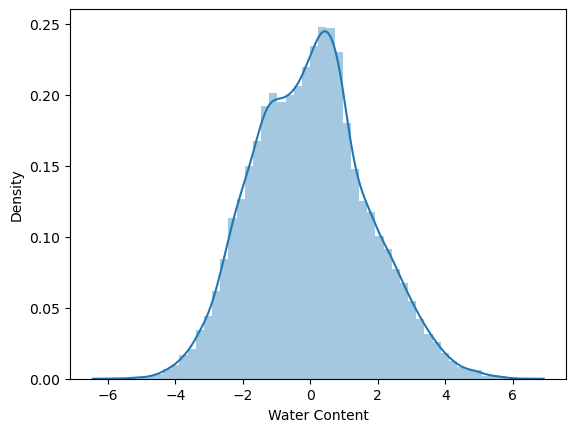

C:\Users\Ishan Yadu\AppData\Local\Temp\ipykernel_3368\1085508905.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Mineral Abundance"])


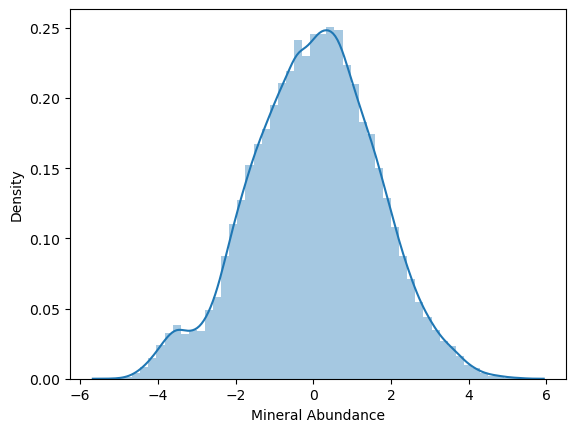

C:\Users\Ishan Yadu\AppData\Local\Temp\ipykernel_3368\1085508905.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Orbital Period"])


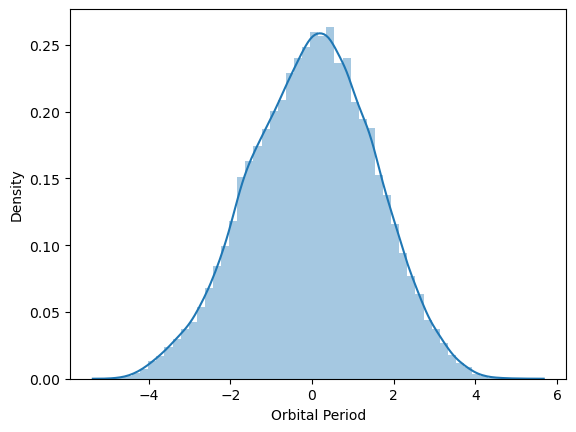

C:\Users\Ishan Yadu\AppData\Local\Temp\ipykernel_3368\1085508905.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Proximity to Star"])


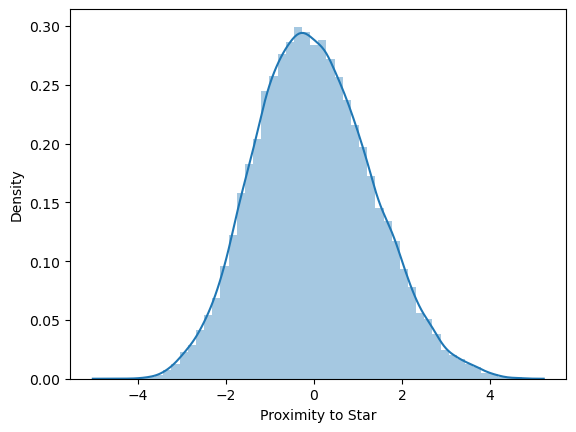

C:\Users\Ishan Yadu\AppData\Local\Temp\ipykernel_3368\1085508905.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["Atmospheric Composition Index"])


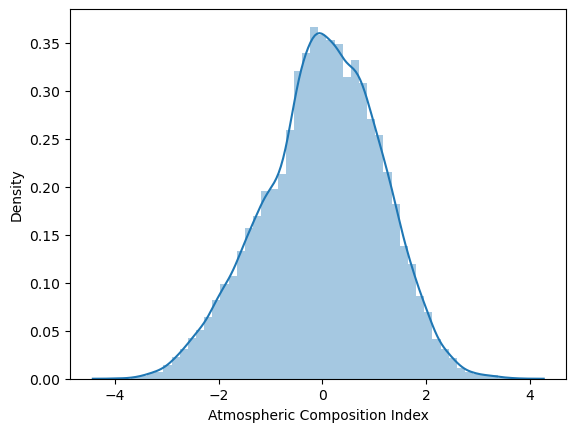

In [18]:
sns.distplot(d1["Atmospheric Density"])
plt.show()
sns.distplot(d1["Surface Temperature"])
plt.show()
sns.distplot(d1["Gravity"])
plt.show()
sns.distplot(d1["Water Content"])
plt.show()
sns.distplot(d1["Mineral Abundance"])
plt.show()
sns.distplot(d1["Orbital Period"])
plt.show()
sns.distplot(d1["Proximity to Star"])
plt.show()
sns.distplot(d1["Atmospheric Composition Index"])
plt.show() #cheching the distribution curve of data

In [19]:
colo = [ "Atmospheric Density", "Surface Temperature", "Gravity", "Water Content",
    "Mineral Abundance", "Orbital Period", "Proximity to Star", "Atmospheric Composition Index"]

for col in colo:
    q1 = d1[col].quantile(0.25)
    q3 = d1[col].quantile(0.75)
    iqr = q3 - q1
    min_value = q1 - 1.5 * iqr
    max_value = q3 + 1.5 * iqr
    d1 = d1[(d1[col] >= min_value) & (d1[col] <= max_value)] #removing outliers with quantile method instead of z score as our distribution is non normal


In [20]:
d1.shape

(32626, 11)

In [21]:
d1.duplicated().sum() #cgeching for any duplicate rows

0

In [22]:
d1.skew() 

Atmospheric Density              0.335114
Surface Temperature              0.275178
Gravity                         -0.053448
Water Content                    0.103719
Mineral Abundance               -0.087733
Orbital Period                  -0.098303
Proximity to Star                0.140306
Magnetic Field Strength          0.297082
Radiation Levels                 0.173973
Atmospheric Composition Index   -0.181836
Prediction                       0.020339
dtype: float64

In [23]:
d1["Prediction"] = d1["Prediction"].astype(int)  
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32626 entries, 4 to 59999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Atmospheric Density            32626 non-null  float64
 1   Surface Temperature            32626 non-null  float64
 2   Gravity                        32626 non-null  float64
 3   Water Content                  32626 non-null  float64
 4   Mineral Abundance              32626 non-null  float64
 5   Orbital Period                 32626 non-null  float64
 6   Proximity to Star              32626 non-null  float64
 7   Magnetic Field Strength        32626 non-null  float64
 8   Radiation Levels               32626 non-null  float64
 9   Atmospheric Composition Index  32626 non-null  float64
 10  Prediction                     32626 non-null  int32  
dtypes: float64(10), int32(1)
memory usage: 2.9 MB


In [24]:
x=d1.iloc[:,:-1]
y=d1["Prediction"]
x.head(8) #splitting the data into x and y

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,6.0,10.0,0.407941
6,-2.971646,-0.648251,-0.915859,0.255504,-0.537165,-2.072251,1.355523,8.0,7.0,1.876232
8,-3.306354,-0.316716,-0.431264,0.389815,-1.961216,-1.510182,0.538593,8.0,7.0,0.934055
10,-0.752712,-2.492542,-1.072433,-2.561734,1.158838,-1.262638,1.447444,14.0,8.0,0.726009
12,1.129258,-3.333453,-4.423914,-1.020409,0.711290,-0.606784,0.047264,13.0,12.0,-1.630504
14,-3.492167,-0.845588,-0.623381,0.532017,-1.911534,-1.216001,0.780758,7.0,8.0,-0.199217
15,-0.618934,3.281918,1.958590,-1.594125,-1.436394,2.387690,1.033312,10.0,9.0,-2.049965
16,0.267885,-0.034130,0.679999,1.239579,0.452620,1.507447,0.682192,14.0,5.0,0.395403


In [25]:
y.head(8)

4     9
6     1
8     1
10    3
12    3
14    1
15    7
16    2
Name: Prediction, dtype: int32

In [26]:
y.unique()

array([9, 1, 3, 7, 2, 6, 0, 5, 8, 4])

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x) 
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x.head(8) #performing standard scaling as deep learning gets well trained with scaled data

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-0.616882,1.479031,0.086637,-0.484307,0.295211,0.044763,-0.301137,-1.321396,0.580445,0.370824
1,-1.345952,-0.336364,-0.505283,0.156077,-0.371039,-1.358636,1.095344,-0.564729,-0.775469,1.695350
2,-1.507320,-0.166274,-0.235851,0.237224,-1.290360,-0.986058,0.459544,-0.564729,-0.775469,0.845425
3,-0.276162,-1.282555,-0.592337,-1.546008,0.723844,-0.821969,1.166885,1.705272,-0.323497,0.657750
4,0.631171,-1.713974,-2.455742,-0.614789,0.434922,-0.387224,0.077153,1.326939,1.484387,-1.468030
5,-1.596904,-0.437605,-0.342667,0.323138,-1.258287,-0.791055,0.648017,-0.943062,-0.323497,-0.176885
6,-0.211665,1.679962,1.092894,-0.961410,-0.951552,1.597718,0.844574,0.191938,0.128474,-1.846421
7,0.215887,-0.021297,0.382005,0.750624,0.267933,1.014233,0.571304,1.705272,-1.679411,0.359514


In [28]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23) #splitting the data into train and test

In [29]:
x_train.shape

(22838, 10)

In [30]:
y_train.shape[0]

22838

In [31]:
import tensorflow 
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from keras.regularizers import L2

ann=Sequential() 
ann.add(Dense(256,input_dim=10,activation="relu")) 
ann.add(BatchNormalization())
ann.add(Dropout(0.4))
ann.add(Dense(224,activation="relu")) 
ann.add(BatchNormalization())
ann.add(Dropout(0.4))
ann.add(Dense(224,activation="relu")) 
ann.add(BatchNormalization())
ann.add(Dropout(0.4))
ann.add(Dense(10,activation="softmax"))

ann.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
ann.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test),callbacks=[early_stopping])

y_pred=ann.predict(x_test)
y_pred=tensorflow.argmax(y_pred,axis=1).numpy()
y_given=ann.predict(x_train)
y_given=tensorflow.argmax(y_given,axis=1).numpy()

print("Test: ",(accuracy_score(y_test,y_pred))*100)
print("Train: ",(accuracy_score(y_train,y_given))*100) #running the ANN deep learning rtechnique as it provided the best results and all the hyperparameters tuning is done by experimenting and training and testing accuracy

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6424 - loss: 1.1545 - val_accuracy: 0.8805 - val_loss: 0.3568
Epoch 2/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8172 - loss: 0.5628 - val_accuracy: 0.8955 - val_loss: 0.3175
Epoch 3/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8388 - loss: 0.4879 - val_accuracy: 0.9010 - val_loss: 0.2960
Epoch 4/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8501 - loss: 0.4499 - val_accuracy: 0.9087 - val_loss: 0.2838
Epoch 5/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8581 - loss: 0.4379 - val_accuracy: 0.9083 - val_loss: 0.2767
Epoch 6/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8635 - loss: 0.4024 - val_accuracy: 0.9123 - val_loss: 0.2633
Epoch 7/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8675 - loss: 0.3976 - val_accuracy: 0.9101 - val_loss: 0.2645
Epoch 8/100
714/714 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8708 - loss: 0.3987 - v

In [32]:
td = pd.read_csv(r"C:\Users\Ishan Yadu\Documents\IITB\Competitions\Cognizance\Cosmic Classifier\cosmictest.csv")
td.head(8) # loading the test data

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,Category_13,Category_6,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,Category_11,Category_10,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,Category_9,Category_9,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,Category_10,Category_9,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,Category_11,Category_6,0.763087
5,-4.005017,-1.901338,0.313775,0.236597,-1.253217,1.025298,0.383182,Category_8,Category_11,-0.285908
6,-0.998918,2.164810,-1.820124,-0.171959,-0.349017,0.718816,-0.668592,Category_11,Category_7,-1.706544
7,-1.247482,1.361764,-1.528481,0.861215,0.403036,-1.490710,-1.216129,Category_8,Category_12,-0.020934


In [33]:
td.isnull().sum()

Atmospheric Density              0
Surface Temperature              0
Gravity                          0
Water Content                    0
Mineral Abundance                0
Orbital Period                   0
Proximity to Star                0
Magnetic Field Strength          0
Radiation Levels                 0
Atmospheric Composition Index    0
dtype: int64

In [34]:
input = td.copy()
input.head(8)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,Category_13,Category_6,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,Category_11,Category_10,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,Category_9,Category_9,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,Category_10,Category_9,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,Category_11,Category_6,0.763087
5,-4.005017,-1.901338,0.313775,0.236597,-1.253217,1.025298,0.383182,Category_8,Category_11,-0.285908
6,-0.998918,2.164810,-1.820124,-0.171959,-0.349017,0.718816,-0.668592,Category_11,Category_7,-1.706544
7,-1.247482,1.361764,-1.528481,0.861215,0.403036,-1.490710,-1.216129,Category_8,Category_12,-0.020934


In [35]:
encode = [[ "Category_0", "Category_1", "Category_2", "Category_3",
       "Category_4", "Category_5", "Category_6", "Category_7",
       "Category_8", "Category_9", "Category_10", "Category_11",
       "Category_12", "Category_13", "Category_14", "Category_15",
       "Category_16", "Category_17", "Category_18", "Category_19", "Category_20"]]

d3= OrdinalEncoder(categories = encode)
d3.fit(td[["Magnetic Field Strength"]])
td["Magnetic Field Strength"]=d3.transform(td[["Magnetic Field Strength"]])

d3.fit(td[["Radiation Levels"]])
td["Radiation Levels"]=d3.transform(td[["Radiation Levels"]])

td.head(8)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,13.0,6.0,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,11.0,10.0,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,9.0,9.0,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,10.0,9.0,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,11.0,6.0,0.763087
5,-4.005017,-1.901338,0.313775,0.236597,-1.253217,1.025298,0.383182,8.0,11.0,-0.285908
6,-0.998918,2.164810,-1.820124,-0.171959,-0.349017,0.718816,-0.668592,11.0,7.0,-1.706544
7,-1.247482,1.361764,-1.528481,0.861215,0.403036,-1.490710,-1.216129,8.0,12.0,-0.020934


In [36]:
sc=StandardScaler()
sc.fit(td) 
td=pd.DataFrame(sc.transform(td),columns=td.columns)
td.head(8) #similar pre processing is performed for the test data instead of removing outliers as being the test data, they come from real experimental units and hence there outliers cant be removed

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-0.599760,1.457427,-0.048354,-0.720965,-1.255860,0.650425,1.098520,1.339480,-1.231207,-0.708601
1,0.002865,-1.895433,-0.290089,0.912282,-0.182919,-1.210408,0.761475,0.589638,0.571570,-0.352763
2,-1.647620,-0.862559,0.191522,0.593439,-1.349383,0.247136,-0.138638,-0.160204,0.120876,-0.527773
3,2.074172,0.207806,0.604357,-0.231075,-0.563475,-1.249731,1.996692,0.214717,0.120876,-0.227755
4,0.290679,1.392046,-0.596349,1.447569,-0.420573,0.603975,-1.537439,0.589638,-1.231207,0.660691
5,-1.776080,-0.968843,0.221975,0.133782,-0.831387,0.700234,0.222602,-0.535124,1.022265,-0.301453
6,-0.467343,1.072081,-0.975269,-0.105923,-0.274694,0.496216,-0.573241,0.589638,-0.780512,-1.604468
7,-0.575558,0.669007,-0.811640,0.500252,0.188326,-0.974615,-0.987544,-0.535124,1.472959,-0.058418


In [37]:
y_final=ann.predict(td)
y_final=tensorflow.argmax(y_final,axis=1).numpy()
y_final

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
input['Predictions']=y_final
input.head(8)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Predictions
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,Category_13,Category_6,-0.729809,7
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,Category_11,Category_10,-0.341850,2
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,Category_9,Category_9,-0.532658,1
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,Category_10,Category_9,-0.205558,0
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,Category_11,Category_6,0.763087,4
5,-4.005017,-1.901338,0.313775,0.236597,-1.253217,1.025298,0.383182,Category_8,Category_11,-0.285908,1
6,-0.998918,2.164810,-1.820124,-0.171959,-0.349017,0.718816,-0.668592,Category_11,Category_7,-1.706544,4
7,-1.247482,1.361764,-1.528481,0.861215,0.403036,-1.490710,-1.216129,Category_8,Category_12,-0.020934,4


In [39]:
input.to_csv('CosmicClassifier_Cogni2046006_test.csv', index=False) #saving the csv file